# Solution Graded Exercise 2: Hodgkin-Huxley model

first name: ...

last name: ...

sciper: ...

date: ...

*Your teammate*

first name of your teammate: ...

last name of your teammate: ...

sciper of your teammate: ...


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.


** Submission **

Rename this notebook to Ex6_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html

** Note **
We have updated question 6.2 of the online exercise. If you have already started with this exercise in week 2, make sure you check the latest version here: http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html. 

# Exercise 6, getting started

In [4]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)



In [ ]:
HH.getting_started()

## 6.1. Exercise: step current response



### 6.1.1

What is the lowest step current amplitude I_min for generating at least one spike? Determine the value by trying different input amplitudes in the code fragment:

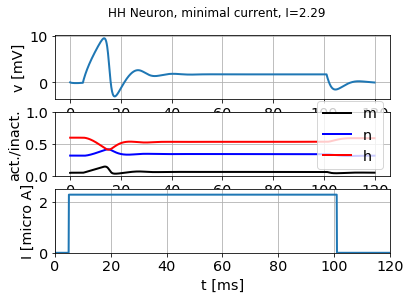

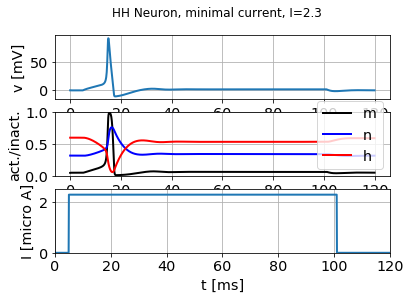

In [5]:
for I_min in np.arange(2.29,2.301,0.01):
   
    current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current, I="+str(I_min))

 The lowest step current amplitude for generating at least one spike is $I_{min}=2.30 \mu A$
 
 

### 6.1.2. Question
What is the lowest step current amplitude to generate repetitive firing?
Discuss the difference between the two regimes.


creating /var/folders/kw/n9fk5zzs3zn85x4kzww4v7cr0000gn/T/scipy-Gallo-2VU6qX/python27_intermediate/compiler_a43d27c4d7e0f14e6813041b5f426380


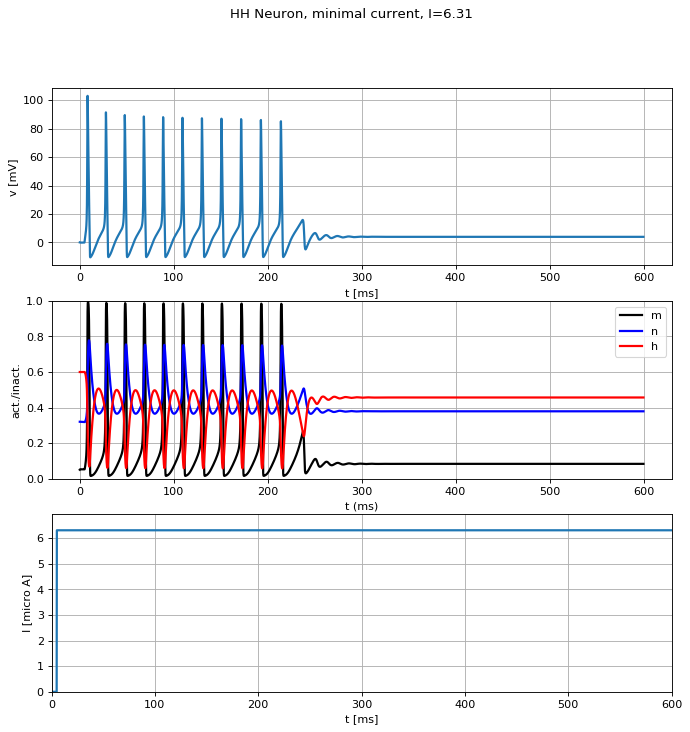

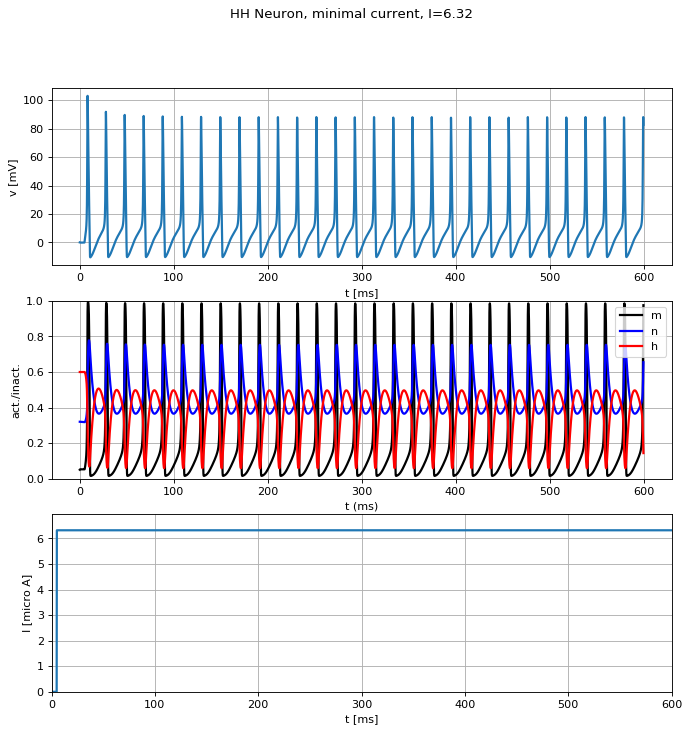

In [4]:

for I_min in np.arange(6.31,6.32,0.01):
    plt.figure(figsize=(10,10),dpi=80)
    current = input_factory.get_step_current(5, 600, b2.ms, I_min *b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 600 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current, I="+str(I_min))

1) The lowest step current amplitude to generate repetitive firing is $I_{min}=6.32 \mu A$
2) 


## 6.2. Exercise: slow and fast ramp current
The minimal current to elicit a spike does not just depend on the amplitude I or on the total charge Q of the current, but on the “shape” of the current. Let’s see why:

### 6.2.1. Question
Inject a slow ramp current into a HH neuron. The current has amplitude 0A at t in [0, 5] ms and linearly increases to an amplitude of 12.0uAmp at t=ramp_t_end. At t>ramp_t_end, the current is set to 0A. Using the following code, reduce slow_ramp_t_end to the maximal duration of the ramp current, such that the neuron does not spike. Make sure you simulate system for at least 20ms after the current stops.

What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?


1)The maximal duration of the ramp current such that the neuron spike is $49$ms, for $50$ms an more the neuron does not spike 

2) the membrane voltage at the time when the current injection stops  is $V_{slow}=10.36 mV$

voltage_slow=34.92835154 mV


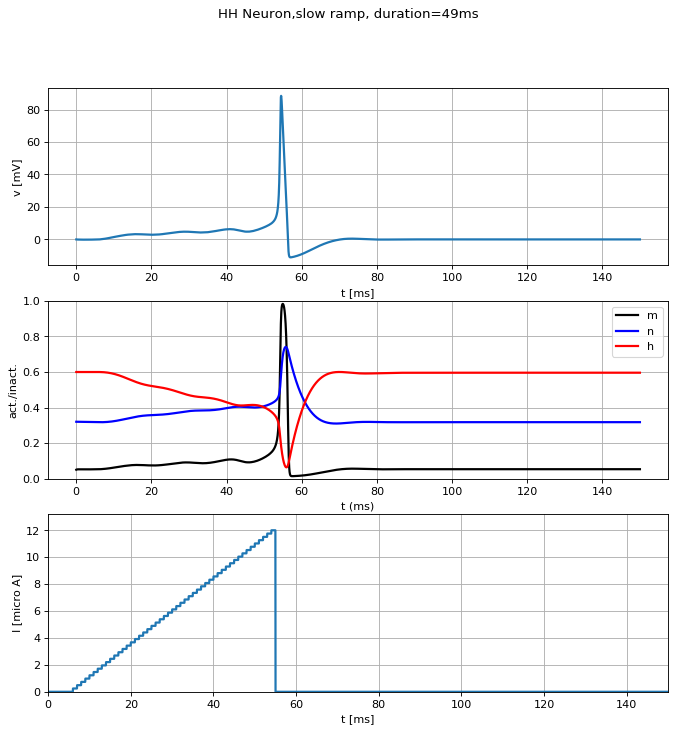

voltage_slow=10.36250878 mV


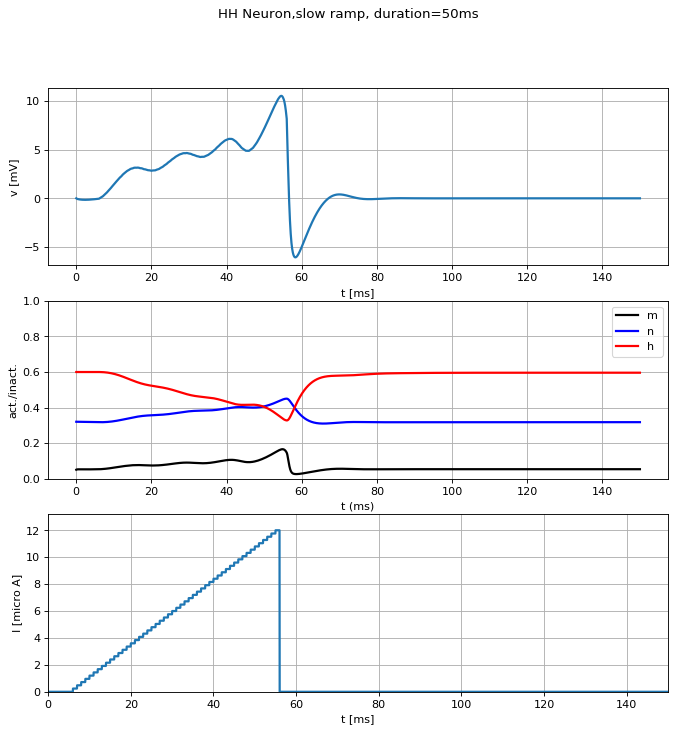

In [10]:
b2.defaultclock.dt = 0.02*b2.ms
for slow_ramp_t_end in np.arange(54,56,1): # TODO why is there no spike for slow_ramp_t_end 51 

    slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
    state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 150 * b2.ms)
    idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
    plt.figure(figsize=(10,10),dpi=80)
    voltage_slow = state_monitor.vm[0,idx_t_end]
   
    print("voltage_slow={}".format(voltage_slow))
    HH.plot_data(state_monitor, title="HH Neuron,slow ramp, duration="+str(slow_ramp_t_end-5)+"ms")


### 6.2.2. Question
Do the same as before but for a fast ramp current: The maximal amplitude at t=ramp_t_end is 4.5uAmp. Start with fast_ramp_t_end = 8ms and then increase it until you observe a spike. Note: Technically the input current is implemented using a TimedArray. For a short, steep ramp, the one milliseconds discretization for the current is not high enough. You can create a finer resolution by setting the parameter unit_time in the function input_factory.get_ramp_current() (see next code block)

What is the membrane voltage at the time when the current injection stops (t=fast_ramp_t_end)?

1) The minimal duration of the fast ramp to get a spike is $3.9$ms

2) the membrane voltage at the time when the current injection stops $V_{fast}=6.37$ mV



voltage_fast=6.20703567 mV


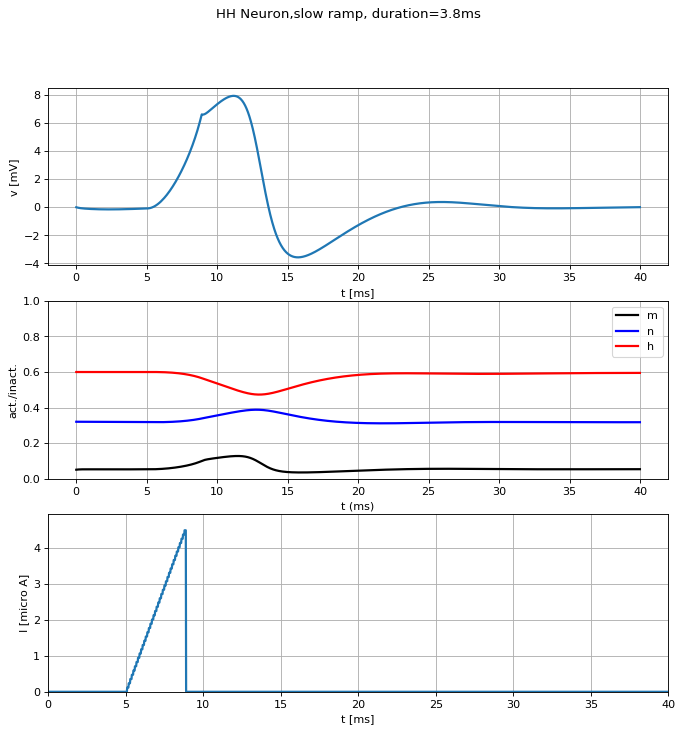

voltage_fast=6.37252564 mV


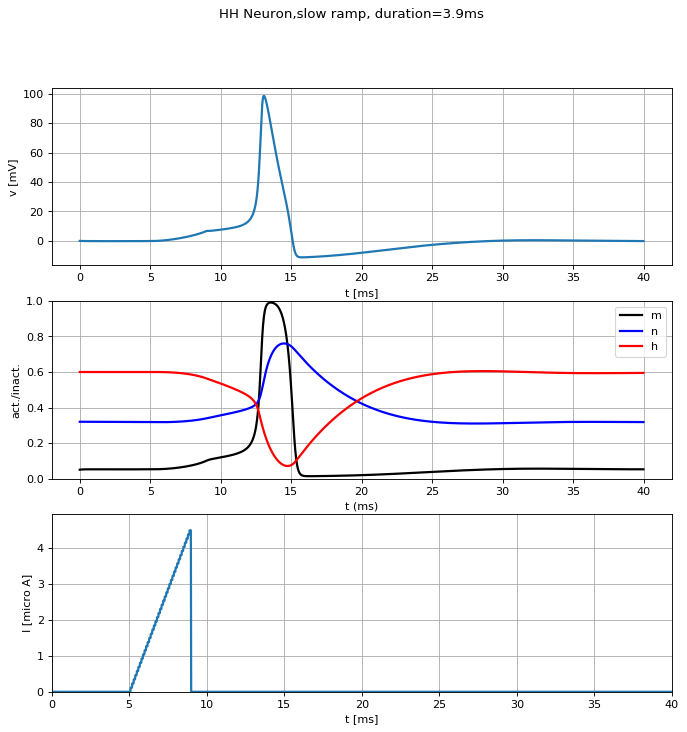

voltage_fast=6.54029859 mV


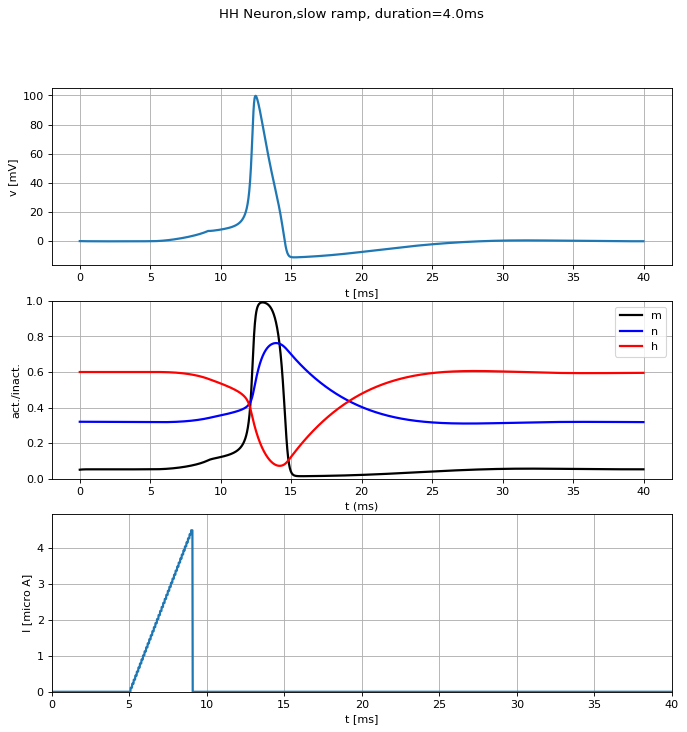

In [84]:
b2.defaultclock.dt = 0.02*b2.ms

for fast_ramp_t_end in np.arange(88,91,1): 

    fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
    state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
    idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
    voltage_fast = state_monitor.vm[0,idx_t_end]
    print("voltage_fast={}".format(voltage_fast))
    plt.figure(figsize=(10,10),dpi=80)
    HH.plot_data(state_monitor, title="HH Neuron,slow ramp, duration="+str((fast_ramp_t_end-50)/10.)+"ms")

### 6.2.3. Question
Discuss the differences between the two situations. Why are the two “threshold” voltages different? Link your observation to the gating variables m,n, and h. Hint: have a look at Chapter 2 Figure 2.3

For the slow ramp current, the threshold come from the gating variable h. As  we can see in Figure 2.3 (Chapter 2), For big value of resting potential the time constant of the desactivation fonction is low, and so after a certain duration the sodium channel will be desactivated.

For the fast ramp current, the time constant of the gating variable h, and n are too big to be take in consideration.
One can explain the threshold by the fact that m does'nt have time to be activated. 




## 6.3 Rebound Spike
A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also after a hyperpolarizing current. Such a spike is called a rebound spike.

### 6.3.1. Question
Inject a hyperpolarizing step current I_amp = -1 uA for 20ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with I_amp = -5 uA What is happening here? To which gating variable do you attribute this rebound spike?

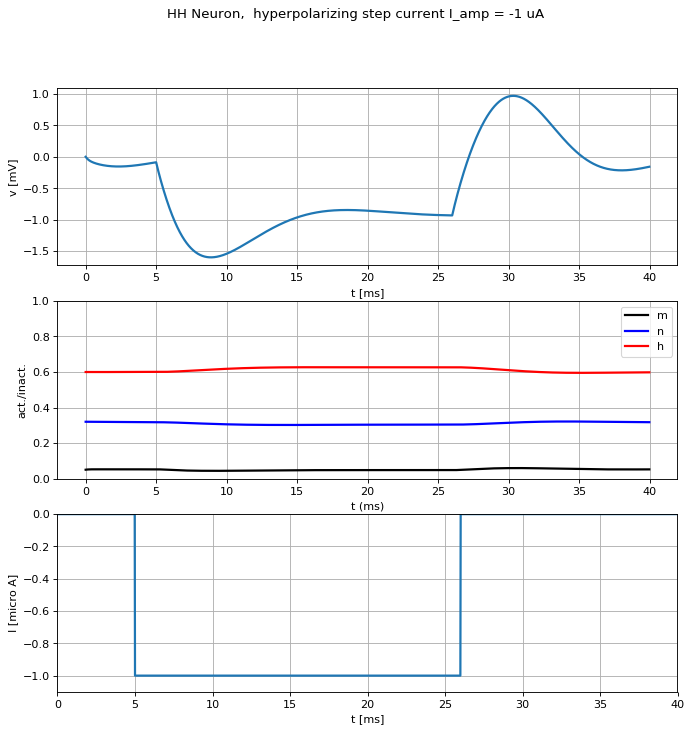

In [89]:
plt.figure(figsize=(10,10),dpi=80)
current = input_factory.get_step_current(5, 25, b2.ms, -1*b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 40 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron,  hyperpolarizing step current I_amp = -1 uA ")

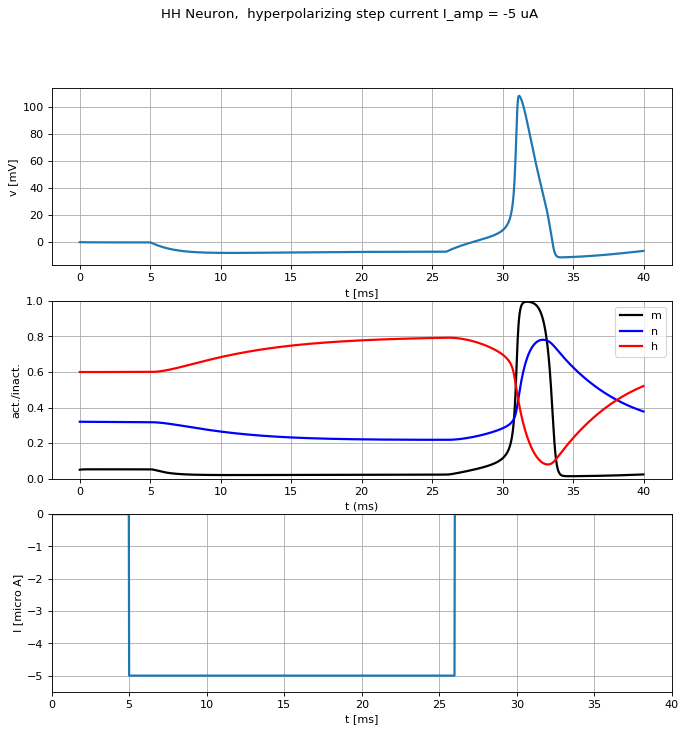

In [90]:
plt.figure(figsize=(10,10),dpi=80)
current = input_factory.get_step_current(5, 25, b2.ms, -5*b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 40 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron,  hyperpolarizing step current I_amp = -5 uA ")

For the hyperpolarizing current of $-5$uA an action potentialsis triggered the inhibitory input. Thsi is a posthinibitory rebound  

As we see h takes big value for a hyperpolarizing current of $-5$uA, but m is 0 for hyperpolarising current so no action potential can be triggered. The channels will be transiently opened if the membrane potential is rapidly relaxed from the hyperpolarized level to the resting potential. Because the time constant $\tau_m << \tau_h$ the activation is faster than inactivation and, thus, there is a short period when both m m and h h are non-zero which gives rise to a rebound spike.





## 6.4 modified HH implementation
 Have a look at the source code and find the conductance parameters gK and gNa.

In [12]:
def simulate_HH_neuron_gNa(input_current, simulation_time, factor=1.4):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = factor*120 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon



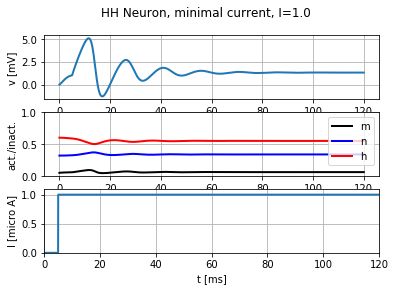

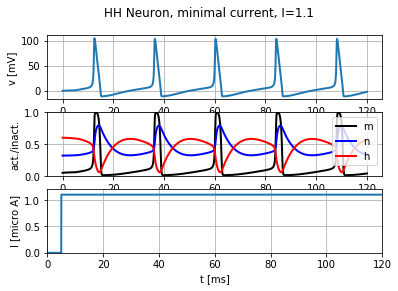

In [13]:
for I_min in np.arange(1.0,1.2,0.1):
    current = input_factory.get_step_current(5, 200, b2.ms, I_min *b2.uA)
    state_monitor = simulate_HH_neuron_gNa(current, 120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current, I="+str(I_min))

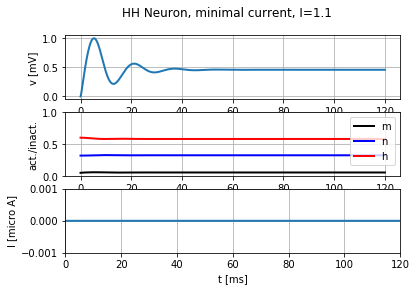

0.45983546 mV


In [17]:
current = input_factory.get_step_current(5, 200, b2.ms, 0*b2.uA)
state_monitor = simulate_HH_neuron_gNa(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current, I="+str(I_min))
rest = state_monitor.vm[0,-1]
print rest

$E_m=\frac{RT}{F}\ln{\frac{P_{Na^+}[Na^+]_{ext}+P_{K^+}[K^+]_{ext}+P_{Cl^-}[Cl-^+]_{int}}{P_{Na^+}[Na^+]_{int}+P_{K^+}[K^+]_{int}+P_{Cl^-}[Cl-^+]_{ext}}}$

As $[Na^+]_{ext}>[Na^+]_{int}$, increasing $P_{Na^+}$ we increase the resting membrane potential 

## 6.5 Reduction to two dimensions: the Morris-Lecar model
This exercise is not available online. All information is given here.
   
* Implement Morris-Lecar (Box in chapter 4.2 of the book: http://neuronaldynamics.epfl.ch/online/Ch4.S2.html). We give you the correct parameters for the model. If you are unsure of how to implement the dynamics in Brian2, compare with the implementation of the HH model:
http://neuronaldynamics-exercises.readthedocs.io/en/latest/_modules/neurodynex/hodgkin_huxley/HH.html#simulate_HH_neuron

* Complete the function plot_state_vars below.

    * Stimulate your Morris-Lecar  neuron with a step current  (130 uAmp for 10ms).  
    * The spike you observe is delayed with  respect to the current onset, then it raises very quickly. Discuss which parameters drive each of the two regimes  and which part of the model is responsible for the transition between the two regimes.

*  On paper, derive the u and w_hat nullclines (w_hat, not w!). Then  insert them into the function get_v_w_nullclines below. 
*  Stimulate  your neuron with  longer current such that you get repetitive firing.  
    *  Plot the response of the system with  plot_state_vars, as you did before
    *  The function plot_phase_plane is given below. Use it to plot the trajectory in the phase plane.
    *  Discuss the phase plane



In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory
from neurodynex.tools import plot_tools

# neuron parameters
EL = -60. * b2.mV
E1 = +60. * b2.mV
E2 = -84. * b2.mV

gL = 2.0 * b2.msiemens
g2 = 8.0 * b2.msiemens
g1 = 9. * b2.msiemens

C = 5. * b2.ufarad

u1 = -1.2*b2.mV
u2 =18.0*b2.mV
u3 = 7.0*b2.mV
u4 = 10.0*b2.mV

tau_w = 30 * b2.ms

def simulate_MorrisLecar_neuron(input_current, simulation_time):

    # Write the dynamical equations for the neuron model. Make sure you use the variable
    # name "v" for the membrane voltage and "w" for w_hat.
    eqs =  """
    m0 = (0.5*(1+tanh((v-u1)/u2)))**3 : 1

    w0 = 0.5*(1+tanh((v-u3)/u4)) : 1
    tau = tau_w/(cosh((v-u3)/(2*u4))) : second
    I_e = input_current(t,i) : amp
    dv/dt = -(g1*m0/C)*(v-E1)-(g2*w/C)*(v-E2)-(gL/C)*(v-EL)+I_e/C : volt
    dw/dt = -1.0/tau*(w-w0) : 1
   
    """
 

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.v = EL

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["v", "w","I_e","m0","w0","tau"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

def plot_state_vars(state_monitor, title=None):

    #     copy the function plot_data from the module neurodynex.hodgkin_huxley.HH and change it accordingly:
    #     http://neuronaldynamics-exercises.readthedocs.io/en/latest/_modules/neurodynex/hodgkin_huxley/HH.html
    
    
    #     1: voltage vs. time
    plt.subplot(311)
    plt.plot(state_monitor.t / b2.ms, state_monitor.v[0] / b2.mV, lw=2)
    plt.xlabel("t [ms]")
    plt.ylabel("v [mV]")
    plt.grid()

    
    
    
    
    #     2: m0, w0, w_hat vs. time
    plt.subplot(312)

    plt.plot(state_monitor.t / b2.ms, state_monitor.m0[0] / b2.volt, "black", lw=2)
    plt.plot(state_monitor.t / b2.ms, state_monitor.w0[0] / b2.volt, "blue", lw=2)
    plt.plot(state_monitor.t / b2.ms, state_monitor.w[0] / b2.volt, "red", lw=2)
    plt.xlabel("t (ms)")
    plt.ylabel("todo")
    plt.legend(("m0", "w0", "w"))
    plt.ylim((0, 1))
    plt.grid()

    #     3: induction current vs. time
    plt.subplot(313)
    plt.plot(state_monitor.t / b2.ms, state_monitor.I_e[0] / b2.uamp, lw=2)
    plt.axis((
        0,
        np.max(state_monitor.t / b2.ms),
        min(state_monitor.I_e[0] / b2.uamp) * 1.1,
        max(state_monitor.I_e[0] / b2.uamp) * 1.1
    ))

    plt.xlabel("t [ms]")
    plt.ylabel("I [micro A]")
    plt.grid()

    if title is not None:
        plt.suptitle(title)

    plt.show()

def get_v_w_nullclines(u_values, EL, E1, E2, gL, g2, g1, u1, u2, u3, u4, current_amplitude):
    m0 = (0.5*(1+np.tanh((u_values-u1)/u2)))**3
    v_nullcline =1/(g2*(u_values-E2))*(-g1*m0*(u_values-E1)-gL*(u_values-EL)+current_amplitude)
    w_nullcline =  0.5*(1+np.tanh((u_values-u3)/u4))
    return v_nullcline, w_nullcline


def plot_phase_plane(state_monitor, u_values, v_nullcline, w_nullcline,num=1):
    def plt_point_by_index(idx, symb, lbl):
        # helper to plot start and end point of trajectory
        v_i = state_monitor.v[0, idx]/ b2.mV
        w_i = state_monitor.w[0, idx]
        plt.plot(v_i, w_i, symb, label = lbl)
    if num==1:   
        plt.plot(u_values/ b2.mV, v_nullcline, 'm-', lw=2, label='u-nullcline')
        plt.plot(u_values/ b2.mV, w_nullcline, 'g-', lw=2, label='w_hat-nullcline')
        plt.scatter(state_monitor.v[0] / b2.mV, state_monitor.w[0], s=5, color='blue', label="trajectory")
        plt_point_by_index(0, "or", "start")
        plt_point_by_index(len(state_monitor.v[0])-1, "oc", "end")
        plt.legend(loc='best')
        plt.grid()
        plt.ylim([-0.1,1.6])
        plt.xlabel("u [mV]")
        plt.ylabel("w hat")
        plt.title("Phase plane for the Morris-Lecar model")
    else:
        plt.plot(u_values/ b2.mV, v_nullcline, 'r-', lw=2, label='u-nullcline_0')
        plt.legend(loc='best')
        





In [2]:
# inject a current, simulate, discuss
time=10
current_amplitude = 140*b2.uA

current =  input_factory.get_step_current(10, 10+time, b2.ms, current_amplitude)
state_monitor = simulate_MorrisLecar_neuron(current, (time+50) * b2.ms)


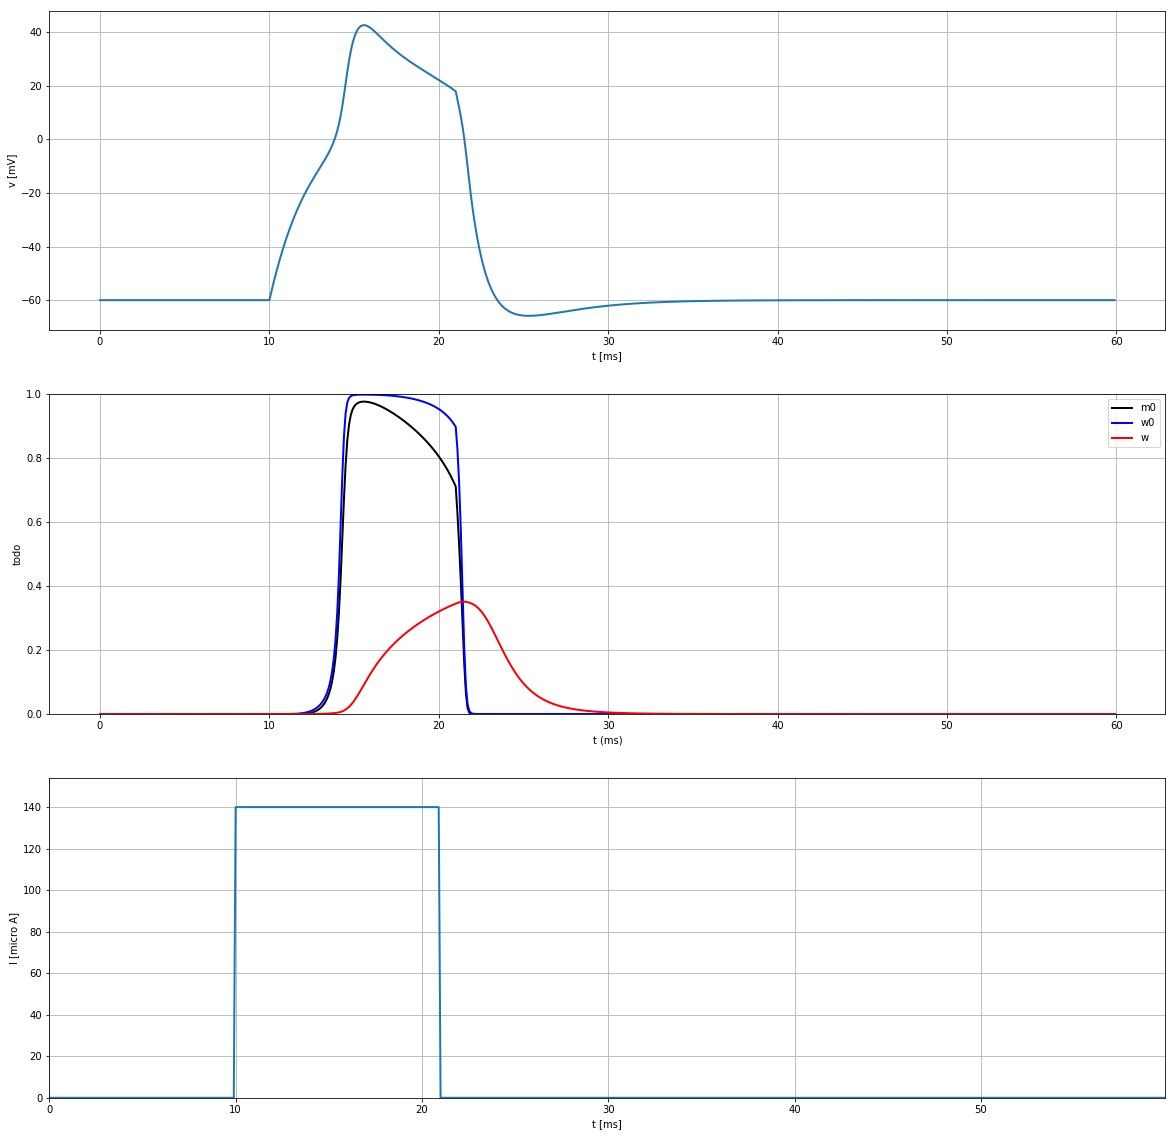

In [3]:
plt.figure(figsize=(20,20))
plot_state_vars(state_monitor)


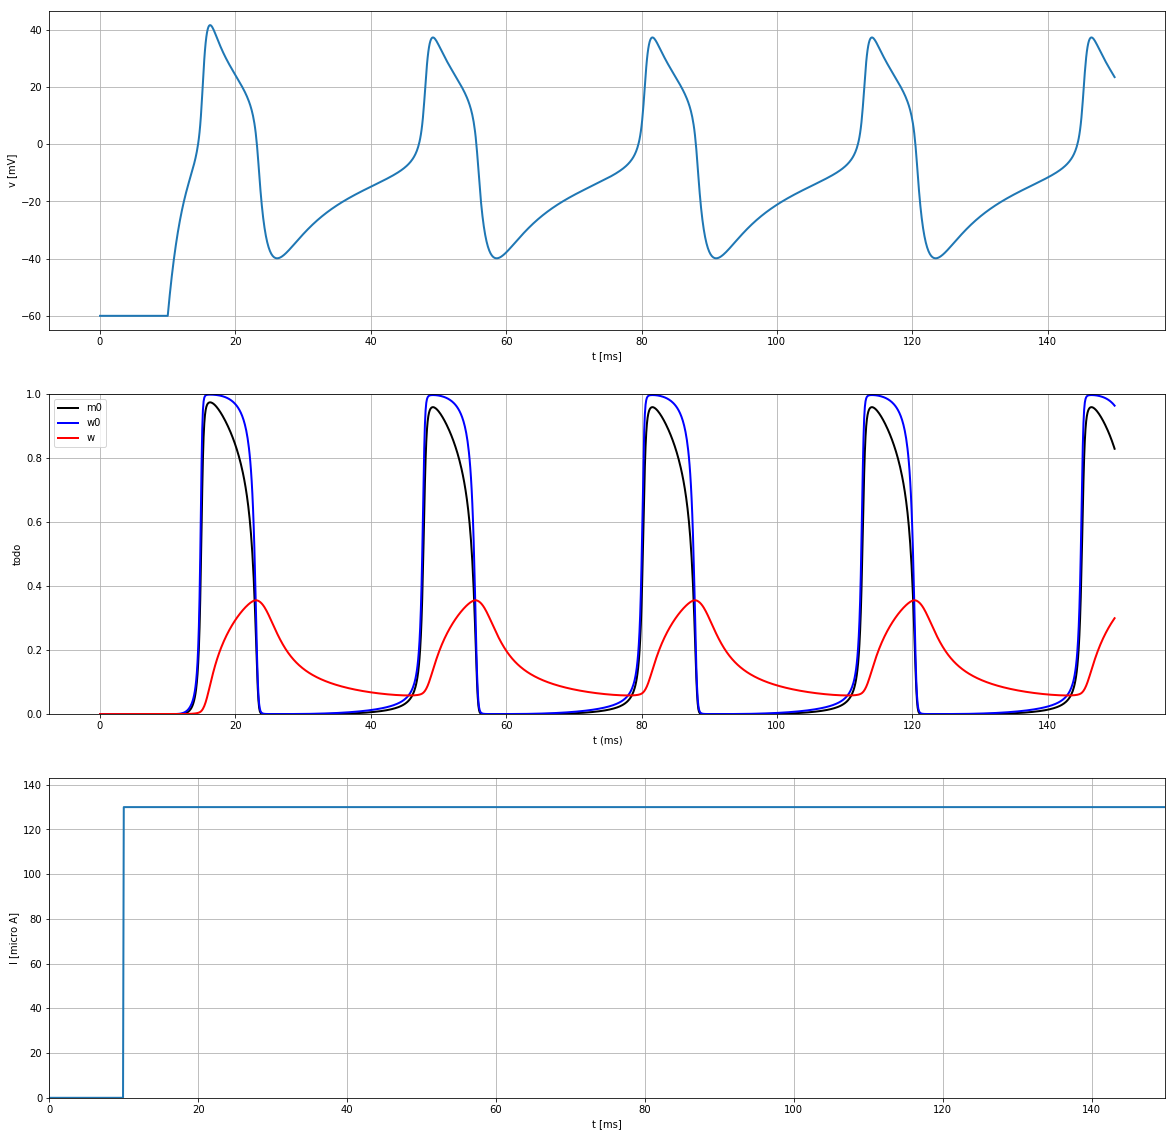

In [8]:
# inject a current, simulate, discuss
time=150
current_amplitude = 130*b2.uA


current =  input_factory.get_step_current(10, time, b2.ms, current_amplitude)
state_monitor = simulate_MorrisLecar_neuron(current, (time) * b2.ms)

plt.figure(figsize=(20,20))
plot_state_vars(state_monitor)



u_values = np.arange(-80, 60.0, 2.0)*b2.mV
v_nullcline, w_nullcline = get_v_w_nullclines(u_values, EL, E1, E2, gL, g2, g1, u1, u2, u3, u4, current_amplitude)
v_nullcline2, w_nullcline2 = get_v_w_nullclines(u_values, EL, E1, E2, gL, g2, g1, u1, u2, u3, u4, 0)


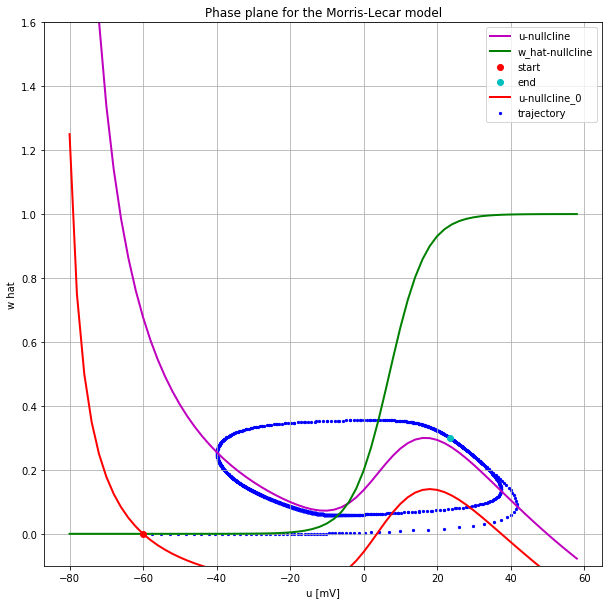

In [9]:
plt.figure(figsize=(10,10))
plot_phase_plane(state_monitor, u_values, v_nullcline, w_nullcline)
plot_phase_plane(state_monitor, u_values, v_nullcline2, w_nullcline2,'0')